# Examples of the pyrankability package

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.core.display import display, HTML
import pandas as pd
import numpy as np
import copy
import os

In [3]:
import sys
sys.path.insert(0,".")

In [4]:
import pyrankability

## Simple examples

In [5]:
n=8
D=np.zeros((n,n))
D[np.triu_indices(n,1)]=1
D[[5,3,7]] = 1-D[[5,3,7]]
D

array([[0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.]])

### Hillside

In [6]:
k_hillside,details_hillside = pyrankability.hillside.bilp(D)
k_hillside

Academic license - for non-commercial use only


54

In [7]:
details_hillside['P']

[(0, 7, 1, 5, 2, 4, 3, 6)]

### LOP

In [8]:
k_lop,details_lop = pyrankability.lop.bilp(D)
k_lop

25.0

In [9]:
details_lop['P']

[(7, 0, 1, 2, 4, 6, 5, 3)]

### Multiple solutions with random restarts

In [10]:
k_hillside_10,details_hillside_10 = pyrankability.hillside.bilp(D,num_random_restarts=10)
k_hillside_10

Read MPS format model from file /tmp/tmpu_k_wd2v/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmpu_k_wd2v/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmpu_k_wd2v/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmpu_k_wd2v/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmpu_k_wd2v/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmpu_k_wd2v/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmpu_k_wd2v/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmpu_k_wd2v/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64

54

In [11]:
details_hillside_10['P']

[(0, 7, 1, 5, 2, 4, 3, 6),
 (0, 7, 1, 2, 5, 3, 4, 6),
 (0, 1, 7, 5, 2, 4, 3, 6),
 (0, 7, 1, 5, 2, 4, 3, 6),
 (0, 1, 7, 5, 2, 3, 4, 6),
 (0, 7, 1, 5, 2, 4, 3, 6),
 (0, 7, 1, 5, 2, 4, 3, 6),
 (0, 7, 1, 5, 2, 4, 3, 6),
 (0, 1, 7, 5, 2, 3, 4, 6),
 (0, 7, 1, 2, 5, 4, 3, 6),
 (0, 7, 1, 5, 2, 3, 4, 6)]

In [12]:
k_lop_10,details_lop_10 = pyrankability.lop.bilp(D,num_random_restarts=10)
k_lop_10

Read MPS format model from file /tmp/tmpg1mfei2o/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmpg1mfei2o/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmpg1mfei2o/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmpg1mfei2o/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmpg1mfei2o/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmpg1mfei2o/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmpg1mfei2o/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmpg1mfei2o/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64

25.0

In [13]:
details_lop_10['P']

[(7, 0, 1, 2, 4, 6, 5, 3),
 (0, 7, 1, 2, 5, 4, 3, 6),
 (0, 7, 1, 5, 2, 4, 3, 6),
 (0, 7, 1, 5, 2, 4, 3, 6),
 (0, 7, 1, 5, 2, 4, 3, 6),
 (0, 7, 1, 2, 5, 4, 3, 6),
 (0, 7, 1, 2, 5, 4, 3, 6),
 (0, 7, 1, 2, 5, 4, 3, 6),
 (0, 7, 1, 2, 5, 4, 3, 6),
 (0, 7, 1, 5, 2, 4, 3, 6),
 (0, 7, 1, 2, 5, 4, 3, 6)]

### Multiple solutions with pairs

In [14]:
k_hillside_10_paired,details_hillside_10_paired = pyrankability.hillside.bilp(D,num_random_restarts=10,find_pair=True)
k_hillside_10_paired

Read MPS format model from file /tmp/tmpmxadv2v_/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmpmxadv2v_/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmpmxadv2v_/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmpmxadv2v_/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmpmxadv2v_/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmpmxadv2v_/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmpmxadv2v_/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmpmxadv2v_/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64

54.0

In [15]:
details_hillside_10_paired.keys()

dict_keys(['Pfirst', 'P', 'x', 'objs', 'xs', 'pair_details'])

If you want to check out the second pair:

In [16]:
details_hillside_10_paired['P'][1],details_hillside_10_paired['pair_details']['P'][1]

((0, 1, 7, 5, 2, 3, 4, 6), (0, 7, 1, 2, 5, 4, 3, 6))

Visualize it

/data/env/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


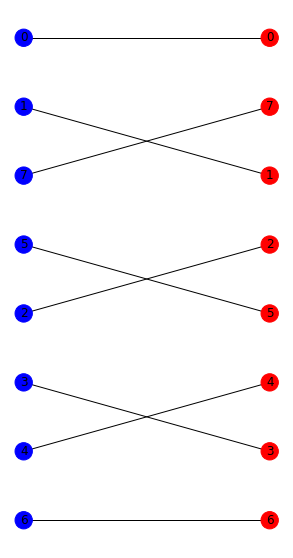

In [17]:
pyrankability.plot.spider(pyrankability.plot.AB_to_P2(details_hillside_10_paired['P'][1],details_hillside_10_paired['pair_details']['P'][1]))

In [18]:
k_lop_10_paired,details_lop_10_paired = pyrankability.lop.bilp(D,num_random_restarts=10,find_pair=True)
k_lop_10_paired

Read MPS format model from file /tmp/tmp2t54ptw4/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmp2t54ptw4/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmp2t54ptw4/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmp2t54ptw4/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmp2t54ptw4/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmp2t54ptw4/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmp2t54ptw4/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmp2t54ptw4/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64

25.0

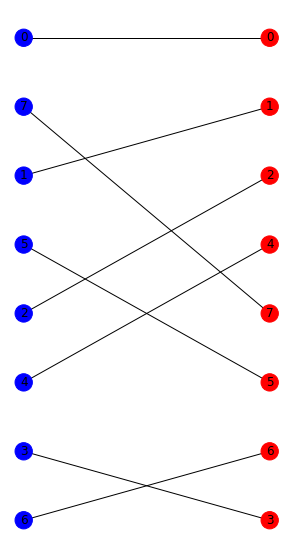

In [19]:
pyrankability.plot.spider(pyrankability.plot.AB_to_P2(details_lop_10_paired['P'][1],details_lop_10_paired['pair_details']['P'][1]))

### Find the two most distant

In [307]:
k_two_distant,details_two_distant = pyrankability.lop.bilp_two_most_distant(D,verbose=True)
k_two_distant

Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
Updating opjective in 0.0022 seconds
Start optimization 0
Optimize a model with 112 rows, 64 columns and 336 nonzeros
Variable types: 0 continuous, 64 integer (64 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 18.0000000
Found heuristic solution: objective 22.0000000
Presolve removed 0 rows and 36 columns
Presolve time: 0.00s
Presolved: 112 rows, 28 columns, 336 nonzeros
Variable types: 0 continuous, 28 integer (28 binary)

Root relaxation: objective 2.500000e+01, 7 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0      25.0000000   25.00000  0.00%     -    0s

Explored 0 nodes (7 simplex iterations) in 0.01 

25.0

In [308]:
details_two_distant

{'k_x': 25.0,
 'k_y': 25.0,
 'perm_x': (0, 1, 2, 4, 6, 7, 5, 3),
 'perm_y': (7, 5, 3, 0, 1, 2, 4, 6),
 'x': array([[0, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 1, 1, 1],
        [0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 1, 0, 1],
        [0, 0, 0, 1, 0, 1, 0, 0]]),
 'y': array([[0, 1, 1, 0, 1, 0, 1, 0],
        [0, 0, 1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 1, 0, 1, 0],
        [1, 1, 1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 1, 0],
        [1, 1, 1, 1, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 0]]),
 'u': array([[0, 0, 0, 1, 0, 1, 0, 1],
        [1, 0, 0, 1, 0, 1, 0, 1],
        [1, 1, 0, 1, 0, 1, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 0, 1, 0, 1],
        [0, 0, 0, 1, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 0, 1],
        [0, 0, 0, 1, 0, 1, 0, 0]]),
 'v': array([[0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0

In [309]:
from scipy import stats
rho,pval1=stats.spearmanr(details_two_distant['perm_x'], details_two_distant['perm_y'])

In [310]:
rho

-0.6904761904761906

In [328]:
tau,pval2=stats.kendalltau(details_two_distant['perm_x'], details_two_distant['perm_y'])

In [329]:
tau

0.4871794871794871

In [313]:
k_two_distant,details_two_distant = pyrankability.hillside.bilp_two_most_distant(D,verbose=True)
k_two_distant

Updating opjective in 0.0027 seconds
Start optimization 0
Optimization in 0.0021 seconds
End optimization 0
Start optimization
Optimization in 0.0038 seconds
End optimization


54

In [314]:
details_two_distant

{'k_x': 54.0, 'k_y': 54.0, 'x': array([[0, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 1, 0, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 1, 1],
        [0, 0, 0, 0, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]]), 'y': array([[0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 1, 0, 0, 0, 0],
        [1, 1, 0, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 1, 0, 0],
        [0, 0, 1, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [0, 1, 1, 1, 1, 1, 1, 0]]), 'perm_x': (0,
  1,
  3,
  2,
  4,
  5,
  6,
  7), 'perm_y': (6, 7, 0, 1, 2, 4, 5, 3)}

In [32]:
tau,pval2=stats.kendalltau(details_two_distant['perm_x'], details_two_distant['perm_y'])

In [33]:
tau

-0.07142857142857142

### N-pal 13 example

In [770]:
data=open("../N-pal13").read().split("\n")
data=data[1:-1]
dt = []
for line in data:
    dt.append([int(k) for k in line.split()])
D_N_pal13 = pd.DataFrame(dt)
D_N_pal13

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,1,0,1,1,0,0,0,0,1,1,0,1
1,0,0,1,0,1,1,0,0,0,0,1,1,0
2,1,0,0,1,0,1,1,0,0,0,0,1,1
3,0,1,0,0,1,0,1,1,0,0,0,0,1
4,0,0,1,0,0,1,0,1,1,0,0,0,0
5,1,0,0,1,0,0,1,0,1,1,0,0,0
6,1,1,0,0,1,0,0,1,0,1,1,0,0
7,1,1,1,0,0,1,0,0,1,0,1,1,0
8,1,1,1,1,0,0,1,0,0,1,0,1,1
9,0,1,1,1,1,0,0,1,0,0,1,0,1


In [1190]:
k_two_distant,details_two_distant = pyrankability.lop.bilp_two_most_distant(D_N_pal13.values,verbose=True)

k_two_distant

Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
Updating opjective in 0.0045 seconds
Start optimization 0
Optimize a model with 572 rows, 78 columns and 1716 nonzeros
Variable types: 0 continuous, 78 integer (78 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 45.0000000
Found heuristic solution: objective 50.0000000
Presolve time: 0.00s
Presolved: 572 rows, 78 columns, 1716 nonzeros
Variable types: 0 continuous, 78 integer (78 binary)

Root relaxation: objective 5.700000e+01, 49 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0      57.0000000   57.00000  0.00%     -    0s

Explored 0 nodes (49 simplex iterations) in 0.02 seconds
Thread count was 8 (of 8 av

57.0

In [1170]:
details_two_distant

{'obj': 34.0,
 'k_x': 57,
 'k_y': 57,
 'perm_x': (8, 11, 0, 9, 3, 12, 6, 7, 1, 10, 4, 2, 5),
 'perm_y': (7, 10, 8, 2, 11, 5, 6, 0, 9, 3, 12, 1, 4),
 'x': array([[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1],
        [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1],
        [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0],
        [0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1],
        [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1],
        [0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0]]),
 'y': array([[0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1],
        [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
       

For this example we've found the full P set:

In [1171]:
full_P = [[4, 10, 1, 12, 3, 9, 0, 6, 5, 11, 2, 8, 7],
[4, 1, 12, 3, 9, 0, 6, 5, 11, 2, 8, 10, 7],
[4, 1, 6, 12, 3, 9, 0, 5, 11, 2, 8, 10, 7],
[4, 10, 1, 6, 12, 3, 9, 0, 5, 11, 2, 8, 7],
[5, 4, 10, 1, 6, 12, 3, 9, 0, 11, 2, 8, 7],
[5, 4, 10, 1, 12, 3, 9, 0, 6, 11, 2, 8, 7],
[5, 4, 10, 1, 7, 6, 12, 3, 9, 0, 11, 2, 8],
[5, 4, 10, 1, 7, 12, 3, 9, 0, 6, 11, 2, 8],
[5, 2, 4, 10, 1, 7, 12, 3, 9, 0, 6, 11, 8],
[5, 2, 4, 10, 1, 7, 6, 12, 3, 9, 0, 11, 8]]
for i in range(len(full_P)):
    full_P[i] = full_P[i][::-1]
full_P

[[7, 8, 2, 11, 5, 6, 0, 9, 3, 12, 1, 10, 4],
 [7, 10, 8, 2, 11, 5, 6, 0, 9, 3, 12, 1, 4],
 [7, 10, 8, 2, 11, 5, 0, 9, 3, 12, 6, 1, 4],
 [7, 8, 2, 11, 5, 0, 9, 3, 12, 6, 1, 10, 4],
 [7, 8, 2, 11, 0, 9, 3, 12, 6, 1, 10, 4, 5],
 [7, 8, 2, 11, 6, 0, 9, 3, 12, 1, 10, 4, 5],
 [8, 2, 11, 0, 9, 3, 12, 6, 7, 1, 10, 4, 5],
 [8, 2, 11, 6, 0, 9, 3, 12, 7, 1, 10, 4, 5],
 [8, 11, 6, 0, 9, 3, 12, 7, 1, 10, 4, 2, 5],
 [8, 11, 0, 9, 3, 12, 6, 7, 1, 10, 4, 2, 5]]

In [1172]:
len(full_P)

10

Find all concordant pairs and discordant pairs

In [1177]:
uc=np.zeros((n,n))
vc=np.zeros((n,n))
ncons = np.zeros((len(full_P),len(full_P)))
ndiss = np.zeros((len(full_P),len(full_P)))
for k,perm_x in enumerate(full_P):
    for z,perm_y in enumerate(full_P):
        ncon = 0
        ndis = 0
        for i in range(n): # i is an item
            i_x = np.where(np.array(perm_x)==i)[0] # location of i in perm_x
            i_y = np.where(np.array(perm_y)==i)[0] # location of i in perm_y
            for j in range(i+1,n): # j is another item
                j_x = np.where(np.array(perm_x)==j)[0] # location of j in perm_x
                j_y = np.where(np.array(perm_y)==j)[0] # location of j in perm_y
                if i_x-j_x > 0 and i_y-j_y < 0:
                    vc[i,j] = 1
                    ndis += 1
                elif i_x-j_x < 0 and i_y-j_y > 0:
                    uc[i,j] = 1
                    ndis += 1
                elif i_x-j_x > 0 and i_y-j_y > 0:
                    ncon += 1
                elif i_x-j_x < 0 and i_y-j_y < 0:
                    ncon += 1
        ncons[k,z] = ncon
        ndiss[k,z] = ndis
ncons = pd.DataFrame(ncons).astype(int)
ndiss = pd.DataFrame(ndiss).astype(int)

In [1178]:
ncons

,0,1,2,3,4,5,6,7,8,9
0,78,68,64,74,66,70,58,62,54,50
1,68,78,74,64,58,62,50,54,48,44
2,64,74,78,68,62,58,54,50,44,48
3,74,64,68,78,70,66,62,58,50,54
4,66,58,62,70,78,74,70,66,58,62
5,70,62,58,66,74,78,66,70,62,58
6,58,50,54,62,70,66,78,74,64,68
7,62,54,50,58,66,70,74,78,68,64
8,54,48,44,50,58,62,64,68,78,74
9,50,44,48,54,62,58,68,64,74,78


In [1179]:
ndiss

,0,1,2,3,4,5,6,7,8,9
0,0,10,14,4,12,8,20,16,24,28
1,10,0,4,14,20,16,28,24,30,34
2,14,4,0,10,16,20,24,28,34,30
3,4,14,10,0,8,12,16,20,28,24
4,12,20,16,8,0,4,8,12,20,16
5,8,16,20,12,4,0,12,8,16,20
6,20,28,24,16,8,12,0,4,14,10
7,16,24,28,20,12,8,4,0,10,14
8,24,30,34,28,20,16,14,10,0,4
9,28,34,30,24,16,20,10,14,4,0


What is the best pair? Best in this case being the farthest away.

In [1181]:
best_pair = ndiss.stack().idxmax()
best_pair

(1, 9)

In [1183]:
print(full_P[best_pair[0]])
print(full_P[best_pair[1]])

[7, 10, 8, 2, 11, 5, 6, 0, 9, 3, 12, 1, 4]
[8, 11, 0, 9, 3, 12, 6, 7, 1, 10, 4, 2, 5]


What did we find using our algorithm?

In [1185]:
print(details_two_distant['perm_y'])
print(details_two_distant['perm_x'])

(7, 10, 8, 2, 11, 5, 6, 0, 9, 3, 12, 1, 4)
(8, 11, 0, 9, 3, 12, 6, 7, 1, 10, 4, 2, 5)


It's the same!

### How does hillside compare?

In [1188]:
k_two_distant_hillside,details_two_distant_hillside = pyrankability.hillside.bilp_two_most_distant(D_N_pal13.values,verbose=True)

k_two_distant_hillside

Updating opjective in 0.0070 seconds
Start optimization 0
Optimization in 0.0069 seconds
End optimization 0
Finished first optimization. Obj: 436
Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
Start optimization
Optimize a model with 1302 rows, 312 columns and 4024 nonzeros
Variable types: 0 continuous, 312 integer (312 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+01]
Found heuristic solution: objective -0.0000000
Presolve removed 1242 rows and 272 columns
Presolve time: 0.00s
Presolved: 60 rows, 40 columns, 180 nonzeros
Found heuristic solution: objective 16.0000000
Variable types: 0 continuous, 40 integer (40 binary)

Root relaxation: cutoff, 0 iterations, 0.00 seconds

Explored 0 nodes (0 simplex iterations) in 0.01 seconds
Thread count was 8 (of 8 available processors)

Solution count 2: 16 6 

Optimal solution found (tolerance 1.00e-04)
Bes

436

In [1189]:
print(details_two_distant_hillside['perm_y'])
print(details_two_distant_hillside['perm_x'])

(8, 11, 9, 7, 12, 10, 6, 2, 0, 5, 3, 1, 4)
(8, 7, 9, 11, 0, 2, 6, 10, 12, 1, 3, 5, 4)


# Please ignore everything lower than this for now

In [1174]:
def get_x_from_perm(p):
    xc = np.zeros((n,n))
    p=perm_x
    a=p[0]
    s=0
    for k,a in enumerate(p):
        for b in p[k+1:]:
            xc[a,b] = 1
    return xc

In [1083]:
xc1 = np.triu(np.ones((n,n)),1)
xc1 = xc[np.ix_(perm_x,perm_x)]
xc1

array([[0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [1079]:
np.sum(np.triu(D_N_pal13.values[np.ix_(perm_x,perm_x)],1))

57

In [1084]:
np.sum(xc1*D_N_pal13.values)

39.0

In [1085]:
np.sum(xc*D_N_pal13.values)

57.0

In [929]:
r = np.sum(xc,axis=0)
ranking = np.argsort(r)
list(ranking),perm_x

([7, 8, 2, 11, 5, 6, 0, 9, 3, 12, 1, 10, 4],
 [7, 8, 2, 11, 5, 6, 0, 9, 3, 12, 1, 10, 4])

In [931]:
np.sum(xc*D_N_pal13.values)

57.0

In [932]:
def compute_obj(p):
    a=p[0]
    s=0
    for k,a in enumerate(p):
        for b in p[k+1:]:
            s+=D_N_pal13.values[a,b]
    return s

In [933]:
compute_obj(perm_x)

57

In [934]:
compute_obj(perm_y)

57

In [1086]:
#yc = np.triu(np.ones((n,n)),1)
#yc = yc[np.ix_(perm_y,perm_y)]
#yc
yc = np.zeros((n,n))
p=perm_y
a=p[0]
s=0
for k,a in enumerate(p):
    for b in p[k+1:]:
        yc[a,b] = 1
yc

array([[0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.],
       [0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.],
       [1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.],
       [0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.],
       [0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.],
       [0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0.]])

In [936]:
np.sum(yc*D_N_pal13.values)

57.0

In [1072]:
perm_x,perm_y

([7, 8, 2, 11, 5, 6, 0, 9, 3, 12, 1, 10, 4],
 [8, 2, 11, 0, 9, 3, 12, 6, 7, 1, 10, 4, 5])

In [1133]:
(44-34)/pyrankability.common.nCr(n,2)

0.1282051282051282

In [1134]:
(44+14-20)/pyrankability.common.nCr(n,2)

0.48717948717948717

In [1144]:
#perm_x,perm_y=details_two_distant['perm_x'],details_two_distant['perm_y']
perm_x = full_P[0]
perm_y = full_P[6]

In [1164]:
rho,pval1=stats.kendalltau(np.sum(xc,axis=0), np.sum(yc,axis=0))
rho

0.4871794871794871

In [1154]:
ncons

array([[78., 68., 64., 74., 66., 70., 58., 62., 54., 50.],
       [68., 78., 74., 64., 58., 62., 50., 54., 48., 44.],
       [64., 74., 78., 68., 62., 58., 54., 50., 44., 48.],
       [74., 64., 68., 78., 70., 66., 62., 58., 50., 54.],
       [66., 58., 62., 70., 78., 74., 70., 66., 58., 62.],
       [70., 62., 58., 66., 74., 78., 66., 70., 62., 58.],
       [58., 50., 54., 62., 70., 66., 78., 74., 64., 68.],
       [62., 54., 50., 58., 66., 70., 74., 78., 68., 64.],
       [54., 48., 44., 50., 58., 62., 64., 68., 78., 74.],
       [50., 44., 48., 54., 62., 58., 68., 64., 74., 78.]])

In [1155]:
ndiss

array([[ 0., 10., 14.,  4., 12.,  8., 20., 16., 24., 28.],
       [10.,  0.,  4., 14., 20., 16., 28., 24., 30., 34.],
       [14.,  4.,  0., 10., 16., 20., 24., 28., 34., 30.],
       [ 4., 14., 10.,  0.,  8., 12., 16., 20., 28., 24.],
       [12., 20., 16.,  8.,  0.,  4.,  8., 12., 20., 16.],
       [ 8., 16., 20., 12.,  4.,  0., 12.,  8., 16., 20.],
       [20., 28., 24., 16.,  8., 12.,  0.,  4., 14., 10.],
       [16., 24., 28., 20., 12.,  8.,  4.,  0., 10., 14.],
       [24., 30., 34., 28., 20., 16., 14., 10.,  0.,  4.],
       [28., 34., 30., 24., 16., 20., 10., 14.,  4.,  0.]])

In [1156]:
results = pd.DataFrame(ncons-ndiss)
results

,0,1,2,3,4,5,6,7,8,9
0,78.0,58.0,50.0,70.0,54.0,62.0,38.0,46.0,30.0,22.0
1,58.0,78.0,70.0,50.0,38.0,46.0,22.0,30.0,18.0,10.0
2,50.0,70.0,78.0,58.0,46.0,38.0,30.0,22.0,10.0,18.0
3,70.0,50.0,58.0,78.0,62.0,54.0,46.0,38.0,22.0,30.0
4,54.0,38.0,46.0,62.0,78.0,70.0,62.0,54.0,38.0,46.0
5,62.0,46.0,38.0,54.0,70.0,78.0,54.0,62.0,46.0,38.0
6,38.0,22.0,30.0,46.0,62.0,54.0,78.0,70.0,50.0,58.0
7,46.0,30.0,22.0,38.0,54.0,62.0,70.0,78.0,58.0,50.0
8,30.0,18.0,10.0,22.0,38.0,46.0,50.0,58.0,78.0,70.0
9,22.0,10.0,18.0,30.0,46.0,38.0,58.0,50.0,70.0,78.0


In [1161]:
results.stack().idxmin()

(1, 9)

In [1162]:
full_P[1],full_P[9]

([7, 10, 8, 2, 11, 5, 6, 0, 9, 3, 12, 1, 4],
 [8, 11, 0, 9, 3, 12, 6, 7, 1, 10, 4, 2, 5])

In [1163]:
details_two_distant['perm_x'],details_two_distant['perm_y']

((8, 11, 0, 9, 3, 12, 6, 7, 1, 10, 4, 2, 5),
 (7, 10, 8, 2, 11, 5, 6, 0, 9, 3, 12, 1, 4))

In [1128]:
xc-yc

array([[ 0.,  0.,  0.,  0.,  0., -1., -1., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1., -1., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.],
       [ 1.,  0.,  0.,  1.,  0., -1.,  0., -1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1., -1., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1., -1., -1.,  0.,  0.,  0.,  0.,  0.]])

In [1129]:
uc

array([[0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [1130]:
vc

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [1131]:
np.sum(uc+vc)

34.0

In [1087]:
uc=np.triu(((xc-yc)>0),1)*1#+np.tril(((xc-yc)<0),1)*1
uc

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [1088]:
vc=np.triu(((xc-yc)<0),1)*1#+np.tril(((xc-yc)>0),1)*1
vc

array([[0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [1090]:
np.sum(uc+vc)

20

In [1115]:
to_check={'x':xc,'y':yc,'u':uc,'v':vc}

In [1116]:
#first_k,first_details = pyrankability.lop.bilp(D_N_pal13.values,num_random_restarts=100)

In [1117]:
set(first_details['P'])

{(7, 8, 2, 11, 0, 9, 3, 12, 6, 1, 10, 4, 5),
 (7, 8, 2, 11, 5, 0, 9, 3, 12, 6, 1, 10, 4),
 (7, 8, 2, 11, 5, 6, 0, 9, 3, 12, 1, 10, 4),
 (7, 8, 2, 11, 6, 0, 9, 3, 12, 1, 10, 4, 5),
 (7, 10, 8, 2, 11, 5, 0, 9, 3, 12, 6, 1, 4),
 (7, 10, 8, 2, 11, 5, 6, 0, 9, 3, 12, 1, 4),
 (8, 2, 11, 0, 9, 3, 12, 6, 7, 1, 10, 4, 5),
 (8, 2, 11, 6, 0, 9, 3, 12, 7, 1, 10, 4, 5),
 (8, 11, 0, 9, 3, 12, 6, 7, 1, 10, 4, 2, 5),
 (8, 11, 6, 0, 9, 3, 12, 7, 1, 10, 4, 2, 5)}

In [1094]:
len(set(first_details['P']))

10

In [1095]:
for i,p in enumerate(first_details['P']):
    if np.all(list(p) == list(perm_x)):
        x_correct = first_details['xs'][i]
        break
x_correct

array([[0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1],
       [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1],
       [1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1],
       [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1],
       [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]])

In [1096]:
np.sum(x_correct,axis=0),np.sum(xc,axis=0)

(array([ 6, 10,  2,  8, 12,  4,  5,  0,  1,  7, 11,  3,  9]),
 array([ 6., 10.,  2.,  8., 12.,  4.,  5.,  0.,  1.,  7., 11.,  3.,  9.]))

In [1097]:
np.all(x_correct==xc)

True

In [1098]:
xc

array([[0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.],
       [0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1.],
       [1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1.],
       [1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.],
       [0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1.],
       [0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [1124]:
k_two_distant,details_two_distant = pyrankability.lop.bilp_two_most_distant(D_N_pal13.values,verbose=True,to_check=to_check)
k_two_distant

    0  1  2  3  4  5  6  7  8  9  10  11  12
0   0  1  0  1  1  0  0  0  0  1   1   0   1
1   0  0  1  0  1  1  0  0  0  0   1   1   0
2   1  0  0  1  0  1  1  0  0  0   0   1   1
3   0  1  0  0  1  0  1  1  0  0   0   0   1
4   0  0  1  0  0  1  0  1  1  0   0   0   0
5   1  0  0  1  0  0  1  0  1  1   0   0   0
6   1  1  0  0  1  0  0  1  0  1   1   0   0
7   1  1  1  0  0  1  0  0  1  0   1   1   0
8   1  1  1  1  0  0  1  0  0  1   0   1   1
9   0  1  1  1  1  0  0  1  0  0   1   0   1
10  0  0  1  1  1  1  0  0  1  0   0   1   0
11  1  0  0  1  1  1  1  0  0  1   0   0   1
12  0  1  0  0  1  1  1  1  0  0   1   0   0
Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
Updating opjective in 0.0054 seconds
Start optimization 0
Optimize a model with 572 rows, 78 columns and 1716 nonzeros
Variable types: 0 continuous, 78 integer (78 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
 

57.0

In [1125]:
details_two_distant['perm_x'],details_two_distant['perm_y']

((8, 11, 0, 9, 3, 12, 6, 7, 1, 10, 4, 2, 5),
 (7, 10, 8, 2, 11, 5, 6, 0, 9, 3, 12, 1, 4))

In [749]:
np.sum(np.triu(details_two_distant['u'])+np.triu(details_two_distant['v']))

34

In [750]:
1*((details_two_distant['y']-details_two_distant['x'])>0)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1],
       [1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [751]:
details_two_distant['v']

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1],
       [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0]])

In [752]:
details_two_distant['u']

array([[0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [753]:
np.all(np.triu(details_two_distant['v'])==np.triu(1*((details_two_distant['y']-details_two_distant['x'])>0)))

True

In [754]:
np.all(np.tril(details_two_distant['v'])==np.tril(1*((details_two_distant['x']-details_two_distant['y'])>0)))

True

In [755]:
np.all(np.tril(details_two_distant['u'])==np.tril(1*((details_two_distant['y']-details_two_distant['x'])>0)))

True

In [756]:
np.all(np.triu(details_two_distant['u'])==np.triu(1*((details_two_distant['x']-details_two_distant['y'])>0)))

True

In [757]:
details_two_distant['u']+details_two_distant['v']

array([[0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
       [1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1],
       [0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1],
       [1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0],
       [1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1],
       [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0]])

In [758]:
details_two_distant['u']-details_two_distant['v']

array([[ 0,  0,  1,  0,  0,  1,  1,  1,  0,  0,  1,  0,  0],
       [ 0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0],
       [ 1,  1,  0, -1, -1,  0, -1,  0,  0, -1,  0, -1, -1],
       [ 0,  0, -1,  0,  0,  1,  1,  1,  0,  0,  1,  0,  0],
       [ 0,  0, -1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  1,  1,  0, -1,  0,  0, -1,  0,  0, -1],
       [ 1,  0, -1,  1,  0, -1,  0,  1,  0, -1,  1,  0, -1],
       [ 1,  0,  0,  1,  0,  0,  1,  0, -1, -1,  0, -1, -1],
       [ 0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  1,  0,  0],
       [ 0,  0, -1,  0,  0, -1, -1, -1,  0,  0,  1,  0,  0],
       [ 1,  1,  0,  1,  0,  0,  1,  0,  1,  1,  0, -1, -1],
       [ 0,  0, -1,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0],
       [ 0,  0, -1,  0,  0, -1, -1, -1,  0,  0, -1,  0,  0]])

In [759]:
np.triu(details_two_distant['x']-details_two_distant['y'])

array([[ 0,  0,  1,  0,  0,  1,  1,  1,  0,  0,  1,  0,  0],
       [ 0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0, -1, -1,  0, -1,  0,  0, -1,  0, -1, -1],
       [ 0,  0,  0,  0,  0,  1,  1,  1,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0, -1],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, -1,  1,  0, -1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0, -1, -1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [760]:
-1*np.tril(details_two_distant['x']-details_two_distant['y'])

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0, -1,  1,  0, -1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0],
       [ 0,  0, -1,  0,  0, -1, -1, -1,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  1,  0,  0,  1,  0,  1,  1,  0,  0,  0],
       [ 0,  0, -1,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0],
       [ 0,  0, -1,  0,  0, -1, -1, -1,  0,  0, -1,  0,  0]])

In [761]:
details_two_distant['perm_x']

(8, 11, 0, 9, 3, 12, 6, 7, 1, 10, 4, 2, 5)

In [762]:
details_two_distant['perm_y']

(7, 10, 8, 2, 11, 5, 6, 0, 9, 3, 12, 1, 4)

In [763]:
details_two_distant['perm_x'], details_two_distant['perm_y']

((8, 11, 0, 9, 3, 12, 6, 7, 1, 10, 4, 2, 5),
 (7, 10, 8, 2, 11, 5, 6, 0, 9, 3, 12, 1, 4))

In [764]:
r,pval1=stats.spearmanr(details_two_distant['perm_x'], details_two_distant['perm_y'])
r

-0.25274725274725274

In [765]:
rho,pval1=stats.kendalltau(details_two_distant['perm_x'], details_two_distant['perm_y'])

In [766]:
rho

-0.12820512820512817

In [438]:
pairwise_spearman = np.zeros((len(full_P),len(full_P)))
pairwise_tau = np.zeros((len(full_P),len(full_P)))
objs = []
for i in range(len(full_P)):
    p=full_P[i]
    a=p[0]
    s=0
    for k,a in enumerate(p):
        for b in p[k+1:]:
            s+=D_N_pal13.values[a,b]
    objs.append(s)
    for j in range(len(full_P)):
        if i == j:
            pairwise_spearman[i,j]=np.NaN
            pairwise_tau[i,j]=np.NaN
        else:
            pairwise_spearman[i,j],pval = stats.spearmanr(full_P[i],full_P[j])
            pairwise_tau[i,j],pval = stats.kendalltau(full_P[i],full_P[j])

objs

[7, 10, 8, 2, 11, 5, 0, 9, 3, 12, 6, 1, 4] [8, 11, 6, 0, 9, 3, 12, 7, 1, 10, 4, 2, 5] 2 8
[8, 11, 6, 0, 9, 3, 12, 7, 1, 10, 4, 2, 5] [7, 10, 8, 2, 11, 5, 0, 9, 3, 12, 6, 1, 4] 8 2


[57, 57, 57, 57, 57, 57, 57, 57, 57, 57]

In [436]:
pd.DataFrame(pairwise_tau)

,0,1,2,3,4,5,6,7,8,9
0,NaN,-0.384615,0.230769,0.230769,0.128205,-0.179487,-0.692308,-0.179487,-0.076923,0.333333
1,-0.384615,NaN,0.230769,-0.128205,-0.128205,0.282051,0.333333,-0.076923,0.128205,-0.128205
2,0.230769,0.230769,NaN,-0.179487,-0.076923,-0.282051,-0.076923,0.076923,0.487179,0.128205
3,0.230769,-0.128205,-0.179487,NaN,-0.025641,0.538462,-0.179487,-0.179487,0.076923,-0.076923
4,0.128205,-0.128205,-0.076923,-0.025641,NaN,0.230769,-0.179487,0.538462,-0.282051,0.282051
5,-0.179487,0.282051,-0.282051,0.538462,0.230769,NaN,0.128205,-0.025641,-0.076923,-0.128205
6,-0.692308,0.333333,-0.076923,-0.179487,-0.179487,0.128205,NaN,0.230769,0.230769,-0.384615
7,-0.179487,-0.076923,0.076923,-0.179487,0.538462,-0.025641,0.230769,NaN,-0.179487,-0.128205
8,-0.076923,0.128205,0.487179,0.076923,-0.282051,-0.076923,0.230769,-0.179487,NaN,0.230769
9,0.333333,-0.128205,0.128205,-0.076923,0.282051,-0.128205,-0.384615,-0.128205,0.230769,NaN


In [326]:
np.nanmax(pairwise_tau),np.nanmin(pairwise_tau)

(0.5384615384615383, -0.6923076923076922)

In [327]:
np.nanmax(pairwise_spearman),np.nanmin(pairwise_spearman)

(0.6043956043956044, -0.8461538461538461)

In [302]:
np.sum(np.tril(D_N_pal13.values[[4, 10, 1, 12, 3, 9, 0, 6, 5, 11, 2, 8, 7],:][:,[4, 10, 1, 12, 3, 9, 0, 6, 5, 11, 2, 8, 7]]))

57

In [303]:
np.sum(np.triu(D_N_pal13.values[np.ix_(details_two_distant['perm_x'],details_two_distant['perm_x'])]))

57

In [637]:
# N_tiny_3 example
data=open("../N_tiny_3").read().split("\n")
data=data[1:-1]
dt = []
for line in data:
    dt.append([int(k) for k in line.split()])
D_N_tiny_3 = pd.DataFrame(dt)
D_N_tiny_3

,0,1,2
0,0,5,3
1,5,0,3
2,3,5,0


In [639]:
k_two_distant,details_two_distant = pyrankability.lop.bilp_two_most_distant(D_N_tiny_3.values,verbose=False)
k_two_distant

13.0

In [640]:
details_two_distant


{'obj': 2.0,
 'k_x': 13,
 'k_y': 13,
 'perm_x': (2, 1, 0),
 'perm_y': (0, 2, 1),
 'x': array([[0, 0, 0],
        [1, 0, 0],
        [1, 1, 0]]),
 'y': array([[0, 1, 1],
        [0, 0, 0],
        [0, 1, 0]]),
 'u': array([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]),
 'v': array([[0, 1, 1],
        [1, 0, 0],
        [1, 0, 0]]),
 'b': array([[0, 0, 0],
        [1, 0, 0],
        [1, 1, 0]])}

In [643]:
rho,pval1=stats.kendalltau(details_two_distant['perm_x'], details_two_distant['perm_y'])
rho

-0.33333333333333337

In [644]:
full_P = [[3,2,1],
[3,1,2],
[1,3,2]]
for i in range(len(full_P)):
    full_P[i] = full_P[i][::-1]
full_P

[[1, 2, 3], [2, 1, 3], [2, 3, 1]]

In [645]:
pairwise_spearman = np.zeros((len(full_P),len(full_P)))
pairwise_tau = np.zeros((len(full_P),len(full_P)))
objs = []
for i in range(len(full_P)):
    p=full_P[i]
    a=p[0]
    s=0
    for k,a in enumerate(p):
        for b in p[k+1:]:
            s+=D_N_tiny_3.values[a,b]
    objs.append(s)
    for j in range(len(full_P)):
        if i == j:
            pairwise_spearman[i,j]=np.NaN
            pairwise_tau[i,j]=np.NaN
        else:
            pairwise_spearman[i,j],pval = stats.spearmanr(full_P[i],full_P[j])
            pairwise_tau[i,j],pval = stats.kendalltau(full_P[i],full_P[j])

objs

IndexError: index 3 is out of bounds for axis 1 with size 3

In [781]:
# N_tiny_3 example
data=open("../N_tiny_3").read().split("\n")
data=data[1:-1]
dt = []
for line in data:
    dt.append([int(k) for k in line.split()])
D_N_tiny_3 = pd.DataFrame(dt)
D_N_tiny_3

,0,1,2
0,0,5,3
1,5,0,3
2,3,5,0


In [783]:
k_two_distant,details_two_distant = pyrankability.lop.bilp_two_most_distant_jonad(D_N_tiny_3.values,verbose=False)
k_two_distant

AttributeError: b"Unable to retrieve attribute 'X'"

In [788]:
# N_tiny_6 example
data=open("../N_tiny_6").read().split("\n")
data=data[1:-1]
dt = []
for line in data:
    dt.append([int(k) for k in line.split()])
D_N_tiny_6 = pd.DataFrame(dt)
D_N_tiny_6

,0,1,2,3,4,5
0,0,1,0,0,0,1
1,0,0,1,1,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,1
4,0,0,0,0,0,0
5,0,1,1,0,1,0


In [789]:
k_two_distant,details_two_distant = pyrankability.lop.bilp_two_most_distant_jonad(D_N_tiny_6.values,verbose=False)
k_two_distant
details_two_distant

AttributeError: b"Unable to retrieve attribute 'X'"

In [786]:
 N_tiny_6 example
data=open("../N_tiny_6").read().split("\n")
data=data[1:-1]
dt = []
for line in data:
    dt.append([int(k) for k in line.split()])
D_N_tiny_6 = pd.DataFrame(dt)
D_N_tiny_6

,0,1,2,3,4,5
0,0,1,0,0,0,1
1,0,0,1,1,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,1
4,0,0,0,0,0,0
5,0,1,1,0,1,0


In [787]:
k_two_distant,details_two_distant = pyrankability.lop.bilp_two_most_distant2(D_N_tiny_6.values,verbose=False)
k_two_distant
details_two_distant

{'obj': 12.0,
 'k_x': 8,
 'k_y': 8,
 'perm_x': (3, 0, 5, 1, 2, 4),
 'perm_y': (3, 0, 5, 4, 2, 1),
 'x': array([[0, 1, 1, 0, 1, 1],
        [0, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 1, 0],
        [1, 1, 1, 0, 1, 1],
        [0, 0, 0, 0, 0, 0],
        [0, 1, 1, 0, 1, 0]]),
 'y': array([[0, 1, 1, 0, 1, 1],
        [0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [1, 1, 1, 0, 1, 1],
        [0, 1, 1, 0, 0, 0],
        [0, 1, 1, 0, 1, 0]]),
 'u': array([[0, 0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0, 1],
        [0, 0, 0, 1, 0, 1],
        [1, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1],
        [0, 1, 1, 0, 1, 0]]),
 'v': array([[0, 1, 1, 0, 1, 1],
        [1, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 1],
        [1, 0, 0, 1, 0, 0],
        [1, 0, 0, 1, 0, 0]]),
 'b': array([[0, 1, 1, 0, 1, 1],
        [0, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 1, 0],
        [1, 1, 1, 0, 1, 1],
        [0, 0, 0, 0, 0, 0],
        [0, 1, 1, 0, 1, 0]])}

In [646]:
# N_tiny_6 example
data=open("../N_tiny_6").read().split("\n")
data=data[1:-1]
dt = []
for line in data:
    dt.append([int(k) for k in line.split()])
D_N_tiny_6 = pd.DataFrame(dt)
D_N_tiny_6

,0,1,2,3,4,5
0,0,1,0,0,0,1
1,0,0,1,1,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,1
4,0,0,0,0,0,0
5,0,1,1,0,1,0


In [649]:
k_two_distant,details_two_distant = pyrankability.lop.bilp_two_most_distant(D_N_tiny_6.values,verbose=False)
k_two_distant
details_two_distant

{'obj': 3.0,
 'k_x': 8,
 'k_y': 8,
 'perm_x': (3, 0, 5, 1, 2, 4),
 'perm_y': (3, 0, 5, 4, 2, 1),
 'x': array([[0, 1, 1, 0, 1, 1],
        [0, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 1, 0],
        [1, 1, 1, 0, 1, 1],
        [0, 0, 0, 0, 0, 0],
        [0, 1, 1, 0, 1, 0]]),
 'y': array([[0, 1, 1, 0, 1, 1],
        [0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [1, 1, 1, 0, 1, 1],
        [0, 1, 1, 0, 0, 0],
        [0, 1, 1, 0, 1, 0]]),
 'u': array([[0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 1, 0],
        [0, 1, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]),
 'v': array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]),
 'b': array([[0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [1, 0, 0, 0, 1, 0],
        [1, 1, 1, 0, 0, 0],
        [1, 0, 0, 1, 0, 0],
        [1, 1, 1, 1, 1, 0]])}

In [650]:
rho,pval1=stats.kendalltau(details_two_distant['perm_x'], details_two_distant['perm_y'])
rho

0.3333333333333333